In [59]:
##Importing neceessary Libraries

import matplotlib.pyplot as plt


#import necessary dependecies
#import plotly.express as px
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import os
import warnings
import numpy as np  
import seaborn as sns
import pandas as pd, os, gc
from sklearn.metrics import roc_curve, auc, log_loss
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler, RobustScaler
%matplotlib inline
warnings.filterwarnings('ignore')
from typing import List

In [63]:
data=pd.read_csv(r'C:\Users\hp\Desktop\masters_project\Warranty_Prediction\Bank-Institution-Term-Deposit-Predictive-Model\notebooks\df_Clean.csv')


In [64]:
data.head(4)

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,...,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,...,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,0,1,...,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
3,3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,...,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0


In [65]:
data.columns

Index(['Unnamed: 0', 'Region', 'State', 'Area', 'City', 'Consumer_profile',
       'Product_category', 'Product_type', 'AC_1001_Issue', 'AC_1002_Issue',
       'AC_1003_Issue', 'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue',
       'Claim_Value', 'Service_Centre', 'Product_Age', 'Purchased_from',
       'Call_details', 'Purpose', 'Fraud'],
      dtype='object')

Let's analyse the data a bit more

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,358.0,370.094972,1344.035904,0.0,128.25,217.5,306.75,11797.0
AC_1001_Issue,358.0,0.332402,0.629446,0.0,0.00,0.0,0.00,2.0
AC_1002_Issue,358.0,0.329609,0.615182,0.0,0.00,0.0,0.75,2.0
AC_1003_Issue,358.0,0.203911,0.529559,0.0,0.00,0.0,0.00,2.0
TV_2001_Issue,358.0,0.377095,0.621943,0.0,0.00,0.0,1.00,2.0
TV_2002_Issue,358.0,0.452514,0.670910,0.0,0.00,0.0,1.00,2.0
TV_2003_Issue,358.0,0.268156,0.508353,0.0,0.00,0.0,0.00,2.0
Claim_Value,358.0,11994.534916,12063.213579,0.0,4006.00,7194.0,15000.00,50000.0
Service_Centre,358.0,12.812849,1.766844,10.0,12.00,13.0,15.00,16.0
Product_Age,358.0,201.843575,259.731564,3.0,14.00,60.0,303.75,991.0


In [33]:
for column in data.columns:
    print("Variable:",column)
    print('No of unique values:',data[column].nunique())
    if data[column].nunique() <10:
        print(data[column].unique())
    print('\n\n')

Variable: Unnamed: 0
No of unique values: 358



Variable: Region
No of unique values: 8
['South' 'North' 'North East' 'North West' 'South East' 'South West'
 'West' 'East']



Variable: State
No of unique values: 20



Variable: Area
No of unique values: 2
['Urban' 'Rural']



Variable: City
No of unique values: 27



Variable: Consumer_profile
No of unique values: 2
['Business' 'Personal']



Variable: Product_category
No of unique values: 2
['Entertainment' 'Household']



Variable: Product_type
No of unique values: 2
['TV' 'AC']



Variable: AC_1001_Issue
No of unique values: 3
[0 1 2]



Variable: AC_1002_Issue
No of unique values: 3
[0 1 2]



Variable: AC_1003_Issue
No of unique values: 3
[0 2 1]



Variable: TV_2001_Issue
No of unique values: 3
[1 0 2]



Variable: TV_2002_Issue
No of unique values: 3
[2 0 1]



Variable: TV_2003_Issue
No of unique values: 3
[0 2 1]



Variable: Claim_Value
No of unique values: 107



Variable: Service_Centre
No of unique values: 7
[10 12 14 16

>> From above ,we can view each column and unique values for columns having less than 10 unique values

In [34]:
##Checking for missing values
data.isnull().sum()

Unnamed: 0          0
Region              0
State               0
Area                0
City                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
Fraud               0
dtype: int64

>>No missing values detected.

In [35]:
##Checking for duplicates in our data
data.duplicated().sum()

0

>>There are no duplicated values in our data

In [37]:
categorical_features=data.select_dtypes(include=['object']).columns
numerical_features=data.select_dtypes(include=['float64','int64']).columns

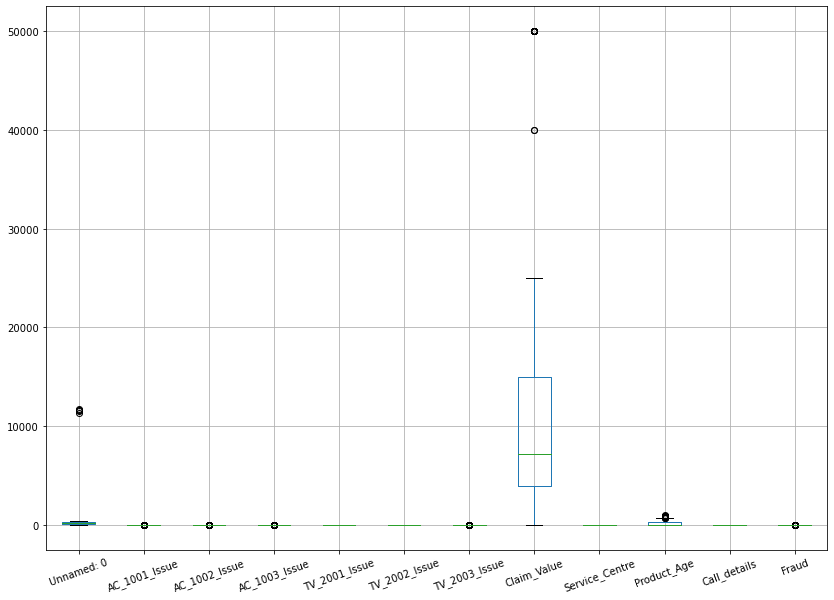

In [38]:
##Checking for outliers
box=numerical_features

#get the summary statistics
num_cols=box.to_list()

plt.figure(figsize=(14,10))
data.boxplot(num_cols)
plt.xticks(rotation=20)
plt.show()


>>The column Claim_Value has some outliers

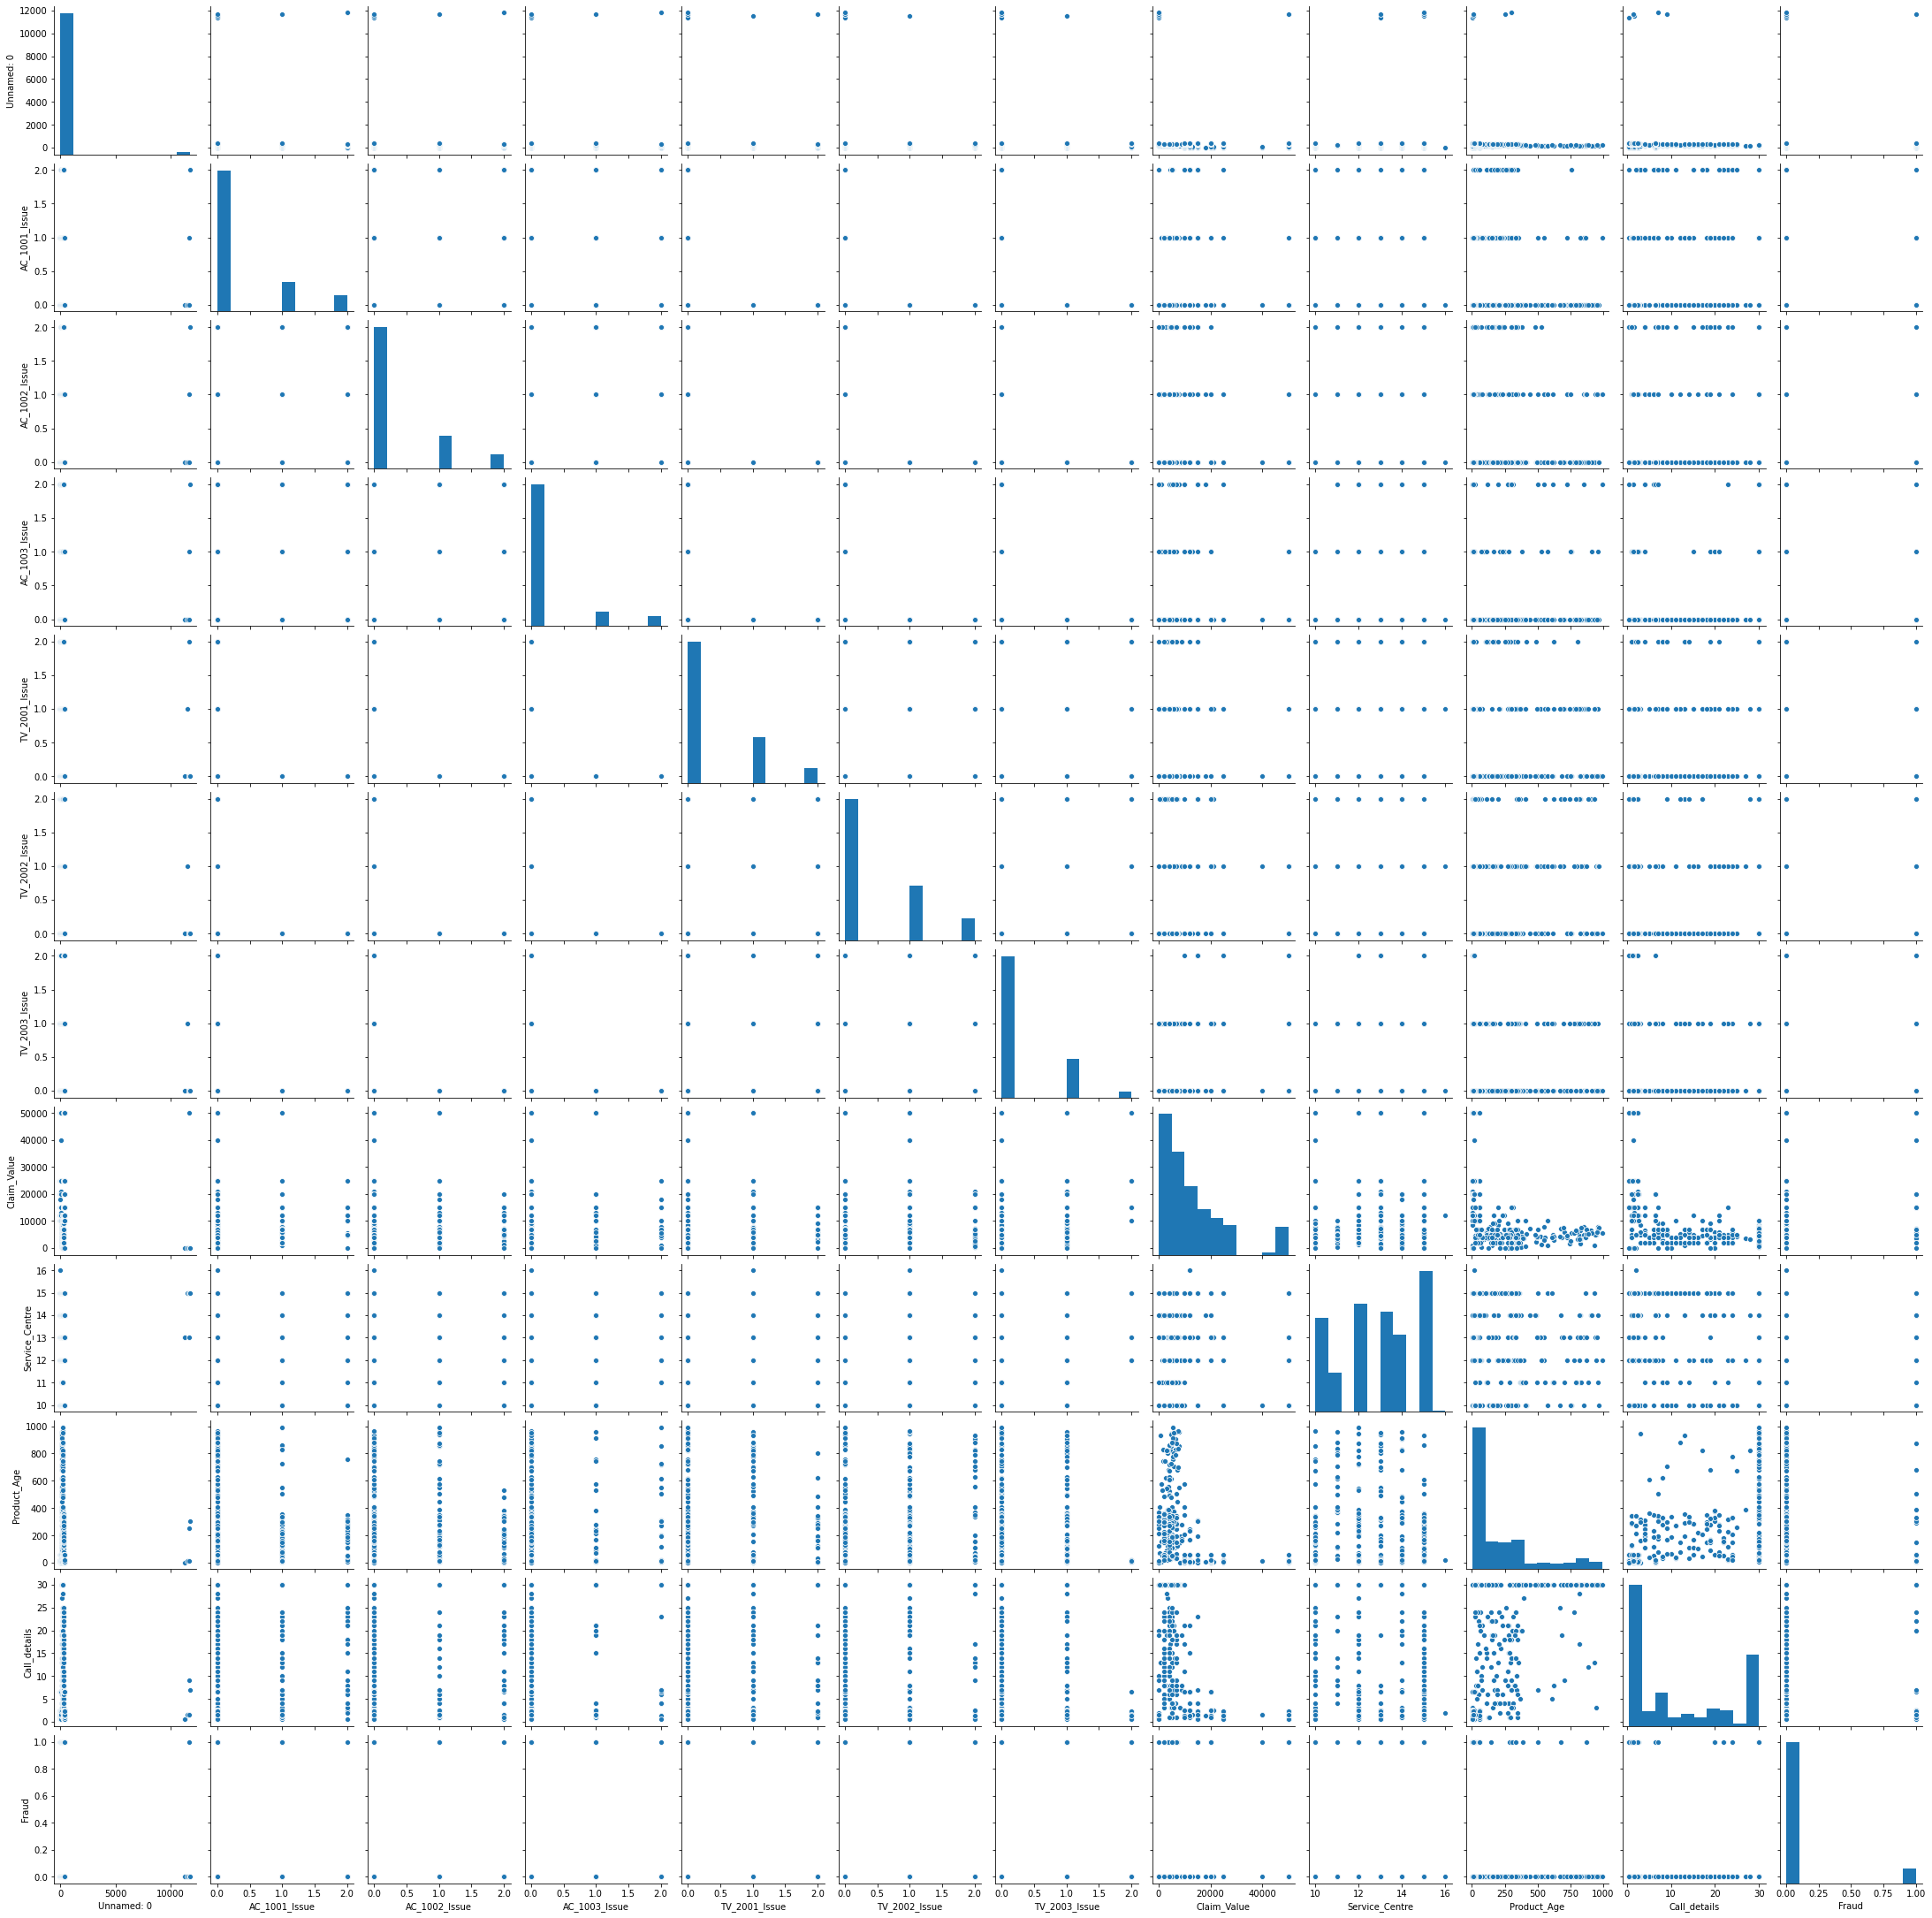

In [45]:
sns.pairplot(data.select_dtypes(include=['float64','int64']))

## <font color='#2F4F4F'>Data Analysis</font>

### Bivariate Analysis 
* (How each variable relates to Fraud)

In [46]:
categorical_features

Index(['Region', 'State', 'Area', 'City', 'Consumer_profile',
       'Product_category', 'Product_type', 'Purchased_from', 'Purpose'],
      dtype='object')

**REGION**

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

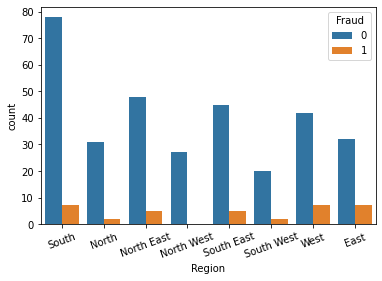

In [52]:
#data['Region'].value_counts().plot(kind='bar')
sns.countplot(x='Region',data=data,hue='Fraud')
plt.xticks(rotation=20)

>> South,West and East regions have the highest Fraud cases

**STATE**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

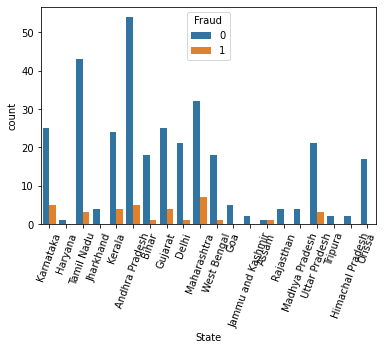

In [64]:
#da.roupby('State').agg({'Fraud':'sum'}).head(5)

sns.countplot(x='State',data=data,hue='Fraud')
plt.xticks(rotation=70)

**AREA**

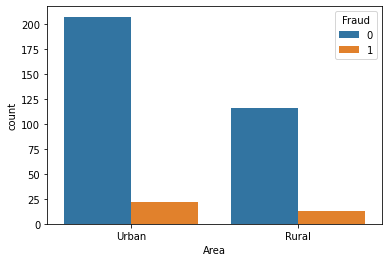

In [70]:
sns.countplot(x='Area',data=data,hue='Fraud')

**CITY**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

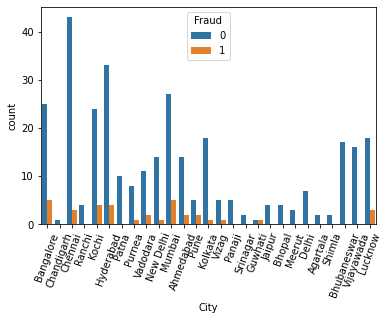

In [72]:
sns.countplot(x='City',data=data,hue='Fraud')
plt.xticks(rotation=70)

**CONSUMER_PROFILE**

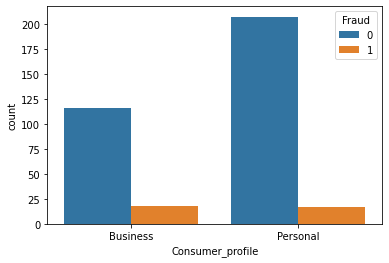

In [73]:
sns.countplot(x='Consumer_profile',data=data,hue='Fraud')

**PRODUCT_CATEGORY**

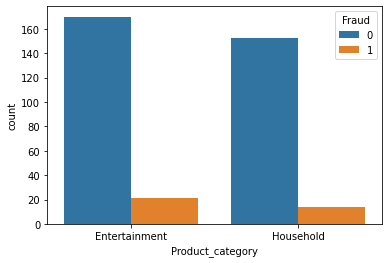

In [74]:
sns.countplot(x='Product_category',data=data,hue='Fraud')

**PRODUCT_TYPE**

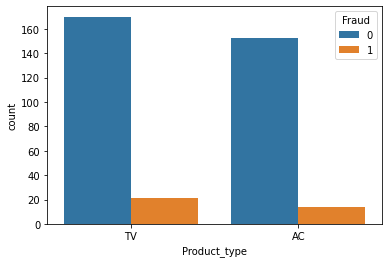

In [75]:
sns.countplot(x='Product_type',data=data,hue='Fraud')

**PURCHASED_FROM**

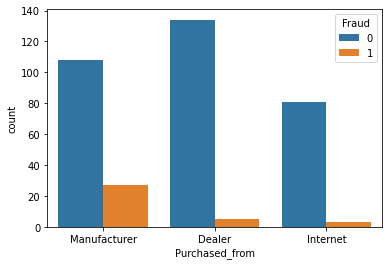

In [76]:
sns.countplot(x='Purchased_from',data=data,hue='Fraud')

**PURPOSE**

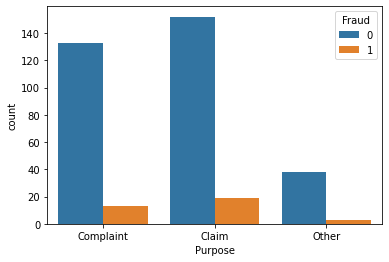

In [77]:
sns.countplot(x='Purpose',data=data,hue='Fraud')

In [78]:
numerical_features

Index(['Unnamed: 0', 'AC_1001_Issue', 'AC_1002_Issue', 'AC_1003_Issue',
       'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue', 'Claim_Value',
       'Service_Centre', 'Product_Age', 'Call_details', 'Fraud'],
      dtype='object')

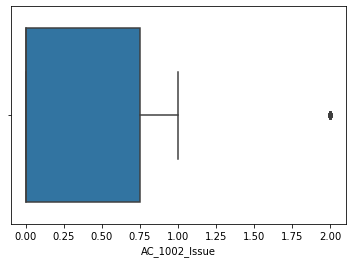

In [80]:
sns.boxplot(x=data['AC_1002_Issue'])

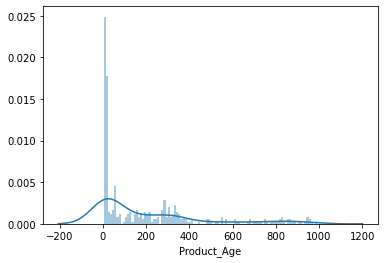

In [85]:
sns.distplot(data.Product_Age,bins=100)

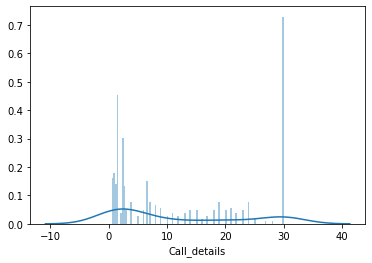

In [89]:
sns.distplot(data.Call_details,bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F12A5DF4F0>,
      dtype=object)

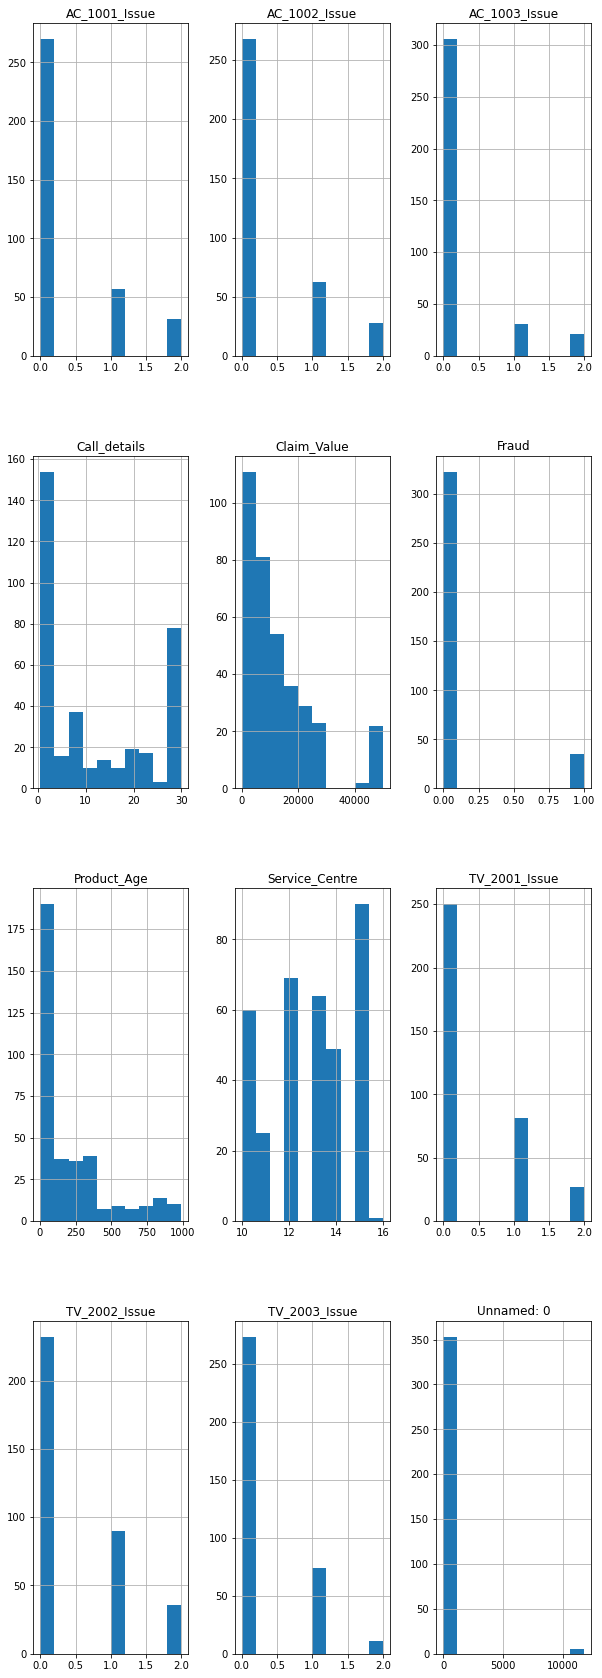

In [94]:
data[numerical_features].hist(figsize=(10,30),bins=10)

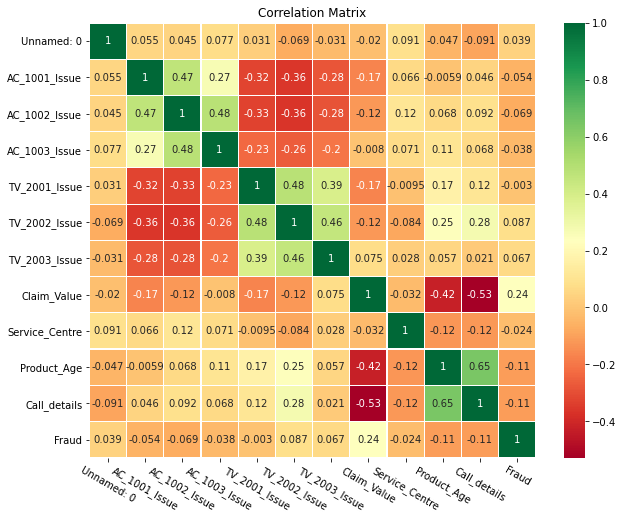

In [93]:
corr=data[numerical_features].corr()

corr_plot=sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)

plt.title('Correlation Matrix')

plt.show()

#### Dealing with outliers
* Data points that falls outside of 1.5 times of an interquartile range (above the third quartile),Q3 and below the 1st quartile(Q1) will be an outlier.

In [6]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)

IQR= Q3-Q1

Lower_Whisker=Q1-(1.5*IQR)
Upper_Whisker=Q3 +(1.5*IQR)

#print(Lower_Whisker,Upper_Whisker)

numeric_data=data.select_dtypes(include=['float64','int64'])

outliers=pd.DataFrame(((((numeric_data<Lower_Whisker )| (numeric_data>Lower_Whisker ))== True)==True).any()).reset_index()

outliers_columns=outliers['index'].to_list()
outliers_columns

['Unnamed: 0',
 'AC_1001_Issue',
 'AC_1002_Issue',
 'AC_1003_Issue',
 'TV_2001_Issue',
 'TV_2002_Issue',
 'TV_2003_Issue',
 'Claim_Value',
 'Service_Centre',
 'Product_Age',
 'Call_details',
 'Fraud']

In [7]:
#Replace outliers with median

def outliers_replace(df,cols):
    for col in cols:
        df[col]=np.where(((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))), df[cols].mean(), df[cols])
        

In [8]:
outliers_replace(data,outliers_columns)


In [9]:
num_data=data.select_dtypes(include=['float64', 'int64'])
(((num_data < (Q1 - 1.5 * IQR)) |(num_data > (Q3 + 1.5 * IQR)))==True).any()

Unnamed: 0        False
AC_1001_Issue      True
AC_1002_Issue      True
AC_1003_Issue      True
TV_2001_Issue      True
TV_2002_Issue      True
TV_2003_Issue      True
Claim_Value       False
Service_Centre     True
Product_Age       False
Call_details       True
Fraud              True
dtype: bool

In [15]:

##SKLEARN MODEL PIPELINE


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

##Function to preprocess the data

num_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                    #('drop_attributes', AttributeDeleter()),
                                    #('std_scaler', StandardScaler())
                            ])
categorical_pipeline=Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

categorical_features = data.select_dtypes(include=['object']).columns
numerical_features = data.select_dtypes(include=['float64', 'int64']).drop(['Fraud'],axis=1).columns

full_pipeline = ColumnTransformer(
        transformers=[('num', num_pipeline, numerical_features),
                     ('cat', categorical_pipeline, categorical_features)])




In [16]:

from sklearn.ensemble import RandomForestRegressor
rf = Pipeline(steps=[('preprocessor', full_pipeline),
                      ('regressor', RandomForestRegressor())])

In [ ]:
rf.fit(X_train,y_train)

In [67]:
from sklearn.preprocessing import LabelEncoder

categorical_features = data.select_dtypes(include=['object']).columns
le=LabelEncoder()

for col in categorical_features.to_list():
    data.loc[:,col]=le.fit_transform(data.loc[:,col])
    
data.head(5)

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,0,4,10,1,2,0,0,1,0,0,...,1,2,0,15000.0,10,60,2,0.5,1,1
1,1,4,10,0,2,0,1,0,1,1,...,0,0,0,20000.0,12,10,0,1.0,1,0
2,2,1,6,1,5,1,1,0,0,1,...,0,0,0,18000.0,14,10,0,1.4,0,0
3,3,4,16,1,6,0,0,1,0,0,...,1,1,0,12000.0,16,20,2,2.0,1,0
4,4,2,9,0,21,1,0,1,0,0,...,0,1,2,25000.0,15,6,0,1.3,0,0


## Class Imbalance

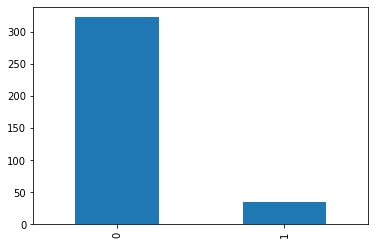

In [68]:
data['Fraud'].value_counts().plot(kind='bar')

From our analysis,we found out that there was class imabalance in out target variable,which could produce misleading results.
This will make the classsifier biased (mostly predicting the most common class).

A highly adopted technique to deal with highlt unbalnced datasets is resmpling.It consists of removing samples from the majority class(under-sampling) and/ or adding more examples from the minority class(over-sampling).

The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

In order to deal with this, we can use the imblearn module from sklearn ie In over-sampling, instead of creating exact copies of the minority class records, we can introduce small variations into those copies, creating more diverse synthetic samples.

Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.

In [69]:
X=data.drop(['Fraud'],axis=1)
y=data['Fraud']

In [70]:
#Splitting the dataset into a training set and test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


In [71]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_train,y_train =smote.fit_sample(X_train,y_train)

In [73]:
#Importing the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Create an instance of the classifier
logistic_classifier=LogisticRegression(random_state=0)
decision_classifier=DecisionTreeClassifier()

#Fitting our data
logistic_classifier.fit(X_train,y_train)
decision_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [74]:
#Predict the test Results

logistic_prediction=logistic_classifier.predict(X_test)
decision_prediction=decision_classifier.predict(X_test)

In [77]:
##Import the evaluation metrics to determine the accuracy of classifiers

from sklearn.metrics import classification_report, accuracy_score

print(accuracy_score(logistic_prediction,y_test))
print(accuracy_score(decision_prediction,y_test))

0.7444444444444445
0.8666666666666667


In [78]:

# We now print the classification report, 
# which is more reliable for a highly imbalanced dataset. 
# We use the precision values which give us accuracy values.
# 
# ---
# The precision will be "how many are correctly classified among that class".
# The recall means "how many of this class you find over the whole number of element of this class".
# The f1-score is the harmonic mean between precision & recall.
# The support is the number of occurence of the given class in your dataset.
# ---
# 

print('Logistic Classifier')
print(classification_report(y_test,logistic_prediction))

print('Decision Tree Classifier')
print(classification_report(y_test,decision_prediction))

Logistic Classifier
              precision    recall  f1-score   support

           0       0.94      0.77      0.85        82
           1       0.17      0.50      0.26         8

    accuracy                           0.74        90
   macro avg       0.56      0.63      0.55        90
weighted avg       0.87      0.74      0.79        90

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        82
           1       0.33      0.50      0.40         8

    accuracy                           0.87        90
   macro avg       0.64      0.70      0.66        90
weighted avg       0.89      0.87      0.88        90



In [79]:

# We can also use a confusion matrix to determine the accuracy of our model
# This will give more details about the model performance.
# ---
# A confusion matrix is a summary of prediction results on a classification problem. 
# The number of correct and incorrect predictions are summarized with count values and broken down by each class.
# The confusion matrix shows the ways in which your classification model is confused when it makes predictions. 
# It gives us insight not only into the errors being made by a classifier but more importantly the types of errors 
# that are being made. The number of correct predictions for each class run on the diagonal 
# from top-left to bottom-right.
# ---
# In the confusion matrix below we get:
# [[66  7]
# [2 25]]
# This can be interpreted by:
# ---
# [[TP, TN]
# [FP, FN]]
# ---
# True Positive (TP) : Observation is positive, and is predicted to be positive.
# False Negative (FN) : Observation is positive, but is predicted negative.
# True Negative (TN) : Observation is negative, and is predicted to be negative.
# False Positive (FP) : Observation is negative, but is predicted positive.



from sklearn.metrics import confusion_matrix

print('Logistic Regression Classifier')
print(confusion_matrix(logistic_prediction,y_test))

print('Decision Tree Classifier')
print(confusion_matrix(decision_prediction,y_test))

Logistic Regression Classifier
[[63  4]
 [19  4]]
Decision Tree Classifier
[[74  4]
 [ 8  4]]


In [82]:
import pickle
#Saving model to disk
pickle.dump(rf, open('model.pkl','wb'))

# Loading model to compare the results
#model = pickle.load(open('model.pkl','rb'))